### Import the relevant packages 

In [21]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader

import torch.nn as nn
import torch.nn.functional as F

### Reading the tumor MRI images 

In [12]:
tumor = []
path_to_tumor_images = glob.iglob('./data/brain_tumor_dataset/yes/*.jpg')

for file in path_to_tumor_images:
    img = cv2.imread(file)

    # resizing the image
    img = cv2.resize(img, (256, 256))

    # reordering the color channels
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])

    tumor.append(img)


print(f'Number of tumor images: {len(tumor)}')

Number of tumor images: 154


### Reading the healthy MRI images

In [13]:
no_tumor = []
path_to_no_tumor_images = glob.iglob('./data/brain_tumor_dataset/no/*.jpg')

for file in path_to_no_tumor_images:
    img = cv2.imread(file)

    # resizing the image
    img = cv2.resize(img, (256, 256))

    # reordering the color channels
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])

    no_tumor.append(img)


print(f'Number of healthy images: {len(no_tumor)}')

Number of healthy images: 91


### Converting the lists of images to numpy arrays

In [14]:
tumor = np.array(tumor)
no_tumor = np.array(no_tumor)

### Taking a look at the dimensions of the arrays

In [15]:
print(f"Shape of tumor images array: {tumor.shape}")
print(f"Number of images: {tumor.shape[0]}")
print(f"Number of channels: {tumor.shape[3]} (RGB)")
print(f"Size of each channel: {tumor.shape[1]} x {tumor.shape[2]}")

print("\n")

print(f"Shape of no tumor images array: {no_tumor.shape}")
print(f"Number of images: {no_tumor.shape[0]}")
print(f"Number of channels: {no_tumor.shape[3]} (RGB)")
print(f"Size of each channel: {no_tumor.shape[1]} x {no_tumor.shape[2]}")

Shape of tumor images array: (154, 256, 256, 3)
Number of images: 154
Number of channels: 3 (RGB)
Size of each channel: 256 x 256


Shape of no tumor images array: (91, 256, 256, 3)
Number of images: 91
Number of channels: 3 (RGB)
Size of each channel: 256 x 256


### Visualize some of the MRI images 

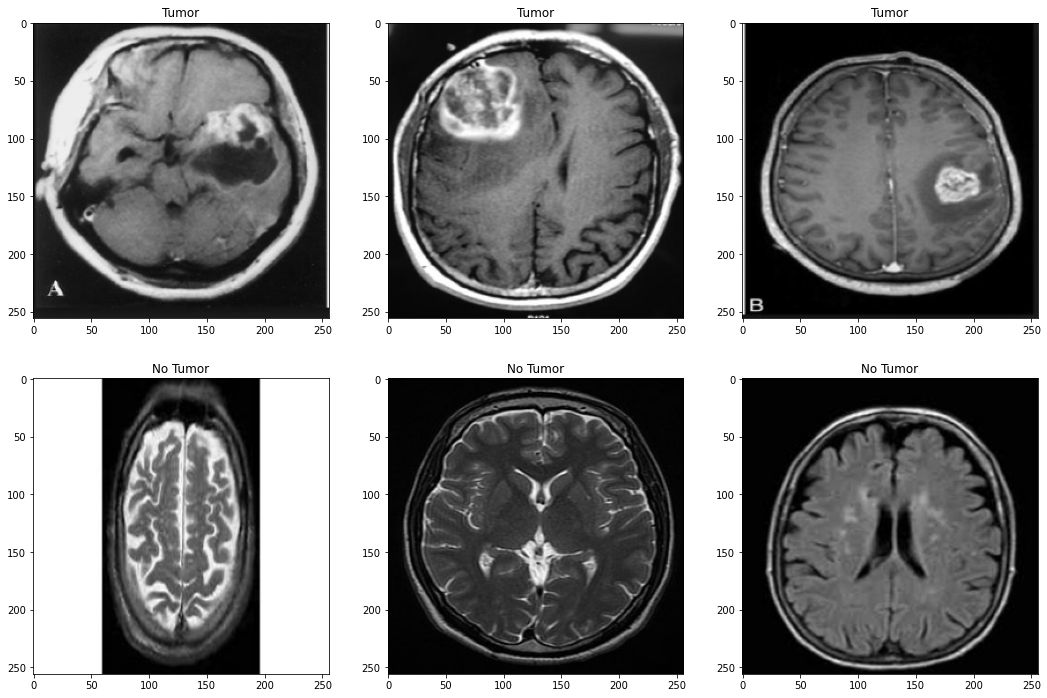

In [16]:
# initialize the plot
plt.figure(figsize=(18, 12))

for i in range(3):
    # tumor images
    plt.subplot(2, 3, i+1)
    plt.title('Tumor')
    plt.imshow(tumor[random.randint(0, len(tumor)-1)])

    # no_tumor images
    plt.subplot(2, 3, i+4)
    plt.title('No Tumor')
    plt.imshow(no_tumor[random.randint(0, len(no_tumor)-1)])

### Creating a custom pytorch Dataset class

In [17]:
class MRI(Dataset):

    def __init__(self, images, labels):
        """Initializes the object. """
        self.images = images
        self.labels = labels

    def __len__(self):
        """Returns the amount of images in the dataset. """
        return self.images.shape[0]

    def __getitem__(self, index):
        """Returns a custom representation of the data inside the object. """
        item = {"image": self.images[index], "label": self.labels[index]}
        return item

    def normalize(self):
        """Normalizes the images"""
        self.images = self.images / 255.0


### Putting the arrays of MRI images into the custom dataset

In [18]:
# create arrays for the labels
tumor_labels = np.ones(tumor.shape[0])
no_tumor_labels = np.zeros(no_tumor.shape[0])

# combine the images into one array for the dataset
combined_images = np.concatenate((tumor, no_tumor), axis=0)

# combine the labels into one array for the dataset
combined_labels = np.concatenate((tumor_labels, no_tumor_labels))

# create an MRI object from the custom dataclass by giving it the images and labels
mri_dataset = MRI(images=combined_images, labels=combined_labels)




# mri_dataset.normalize()

# mri_dataset[0]["image"][100, 192, 2]

### Initializing the DataLoader

In [20]:
dataloader = DataLoader(mri_dataset, batch_size=10, shuffle=True)

for sample in dataloader:
    img = sample['image']
    label = sample['label']

    print(img.shape)
    print(label.shape)

    break


torch.Size([10, 256, 256, 3])
torch.Size([10])
